In [1]:
# import all the necessary elements for thegpt2 models

from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
import torch.nn.functional as F
import torch.nn as nn

# Upload tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


/home/riccorte/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-19 12:54:09.027519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752922449.230295   11287 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752922449.276724   11287 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-19 12:54:09.853571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operat

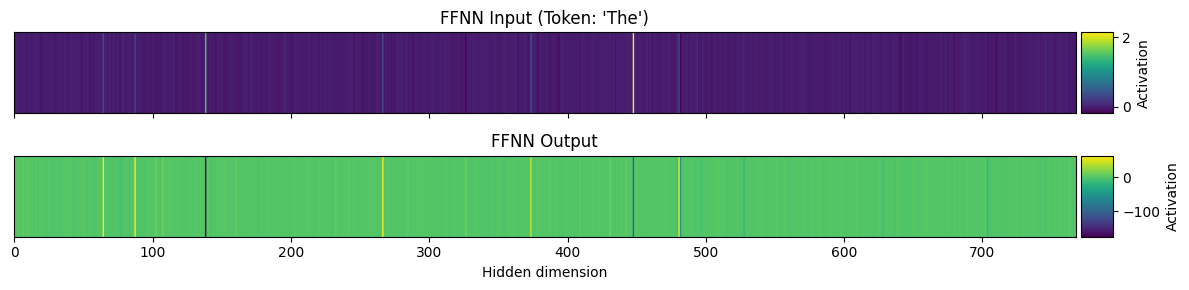

In [2]:
# show, given a prompt the initial value of the buffer, with the color visual, 
# as well as the values before and after passing the FFNN


# Choose a simple input
text = "The quick brown fox"
inputs = tokenizer(text, return_tensors="pt")

# Forward pass to get hidden states
with torch.no_grad():
    outputs = model.transformer(**inputs, output_hidden_states=True)

# Choose a layer (e.g., 11) and get the block
layer_idx = 11
block = model.transformer.h[layer_idx]

# Extract hidden state going into this block
hidden_input = outputs.hidden_states[layer_idx]  # shape: [1, seq_len, 768]

# FFNN input (post-attention, post-ln_2)
x_ln2_input = block.ln_2(hidden_input)
ffnn_output = block.mlp(x_ln2_input)

# Choose token index
token_index = 0
token_str = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][token_index].item())

ffnn_input_vector = x_ln2_input[0, token_index].cpu().detach().numpy()
ffnn_output_vector = ffnn_output[0, token_index].cpu().detach().numpy()

# Plot heatmaps with colorbars
fig, axes = plt.subplots(2, 1, figsize=(12, 3), sharex=True)

# FFNN Input heatmap
ax1 = axes[0]
im1 = ax1.imshow(ffnn_input_vector[np.newaxis, :], cmap="viridis", aspect="auto")
ax1.set_title(f"FFNN Input (Token: '{token_str}')")
ax1.set_yticks([])
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="3%", pad=0.05)
plt.colorbar(im1, cax=cax1).set_label("Activation")

# FFNN Output heatmap
ax2 = axes[1]
im2 = ax2.imshow(ffnn_output_vector[np.newaxis, :], cmap="viridis", aspect="auto")
ax2.set_title("FFNN Output")
ax2.set_yticks([])
ax2.set_xlabel("Hidden dimension")
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="3%", pad=0.05)
plt.colorbar(im2, cax=cax2).set_label("Activation")

plt.tight_layout()
plt.show()


Layer  0 - FFNN Input Vector:  Max = 3.5239, Min = -3.8531
Layer  0 - FFNN Output Vector: Max = 172.4707, Min = -120.2639
Layer  1 - FFNN Input Vector:  Max = 5.9144, Min = -3.8190
Layer  1 - FFNN Output Vector: Max = 510.6499, Min = -2.4664
Layer  2 - FFNN Input Vector:  Max = 19.8680, Min = -1.6340
Layer  2 - FFNN Output Vector: Max = 2316.2131, Min = -0.4760
Layer  3 - FFNN Input Vector:  Max = 9.1452, Min = -0.4502
Layer  3 - FFNN Output Vector: Max = 174.1167, Min = -0.3129
Layer  4 - FFNN Input Vector:  Max = 8.8372, Min = -0.3361
Layer  4 - FFNN Output Vector: Max = 147.3623, Min = -0.3918
Layer  5 - FFNN Input Vector:  Max = 11.0394, Min = -0.3404
Layer  5 - FFNN Output Vector: Max = 98.5408, Min = -1.5203
Layer  6 - FFNN Input Vector:  Max = 10.2457, Min = -0.3123
Layer  6 - FFNN Output Vector: Max = 57.7365, Min = -2.6812
Layer  7 - FFNN Input Vector:  Max = 9.8797, Min = -0.4687
Layer  7 - FFNN Output Vector: Max = 34.7918, Min = -2.3191
Layer  8 - FFNN Input Vector:  Max = 

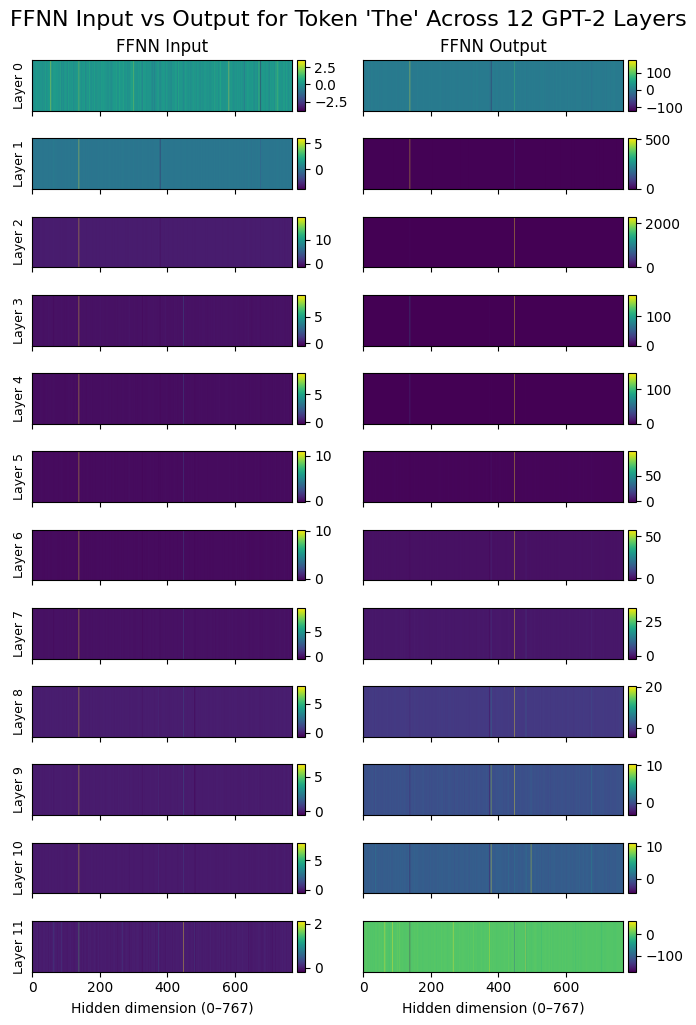

Layer  0 - FFNN Input Vector:  Max = 2.2431, Min = -2.0182
Layer  0 - FFNN Output Vector: Max = 78.2664, Min = -59.1159
Layer  1 - FFNN Input Vector:  Max = 1.4793, Min = -0.7372
Layer  1 - FFNN Output Vector: Max = 4.6456, Min = -11.2076
Layer  2 - FFNN Input Vector:  Max = 1.7891, Min = -1.1210
Layer  2 - FFNN Output Vector: Max = 5.3056, Min = -2.9263
Layer  3 - FFNN Input Vector:  Max = 1.7460, Min = -1.2147
Layer  3 - FFNN Output Vector: Max = 1.1841, Min = -2.4494
Layer  4 - FFNN Input Vector:  Max = 1.5396, Min = -1.8058
Layer  4 - FFNN Output Vector: Max = 6.8435, Min = -2.0566
Layer  5 - FFNN Input Vector:  Max = 1.5087, Min = -1.6062
Layer  5 - FFNN Output Vector: Max = 4.3813, Min = -1.4124
Layer  6 - FFNN Input Vector:  Max = 1.2585, Min = -1.2559
Layer  6 - FFNN Output Vector: Max = 4.8719, Min = -1.8681
Layer  7 - FFNN Input Vector:  Max = 1.1134, Min = -1.2450
Layer  7 - FFNN Output Vector: Max = 13.5979, Min = -3.4347
Layer  8 - FFNN Input Vector:  Max = 0.8856, Min = -

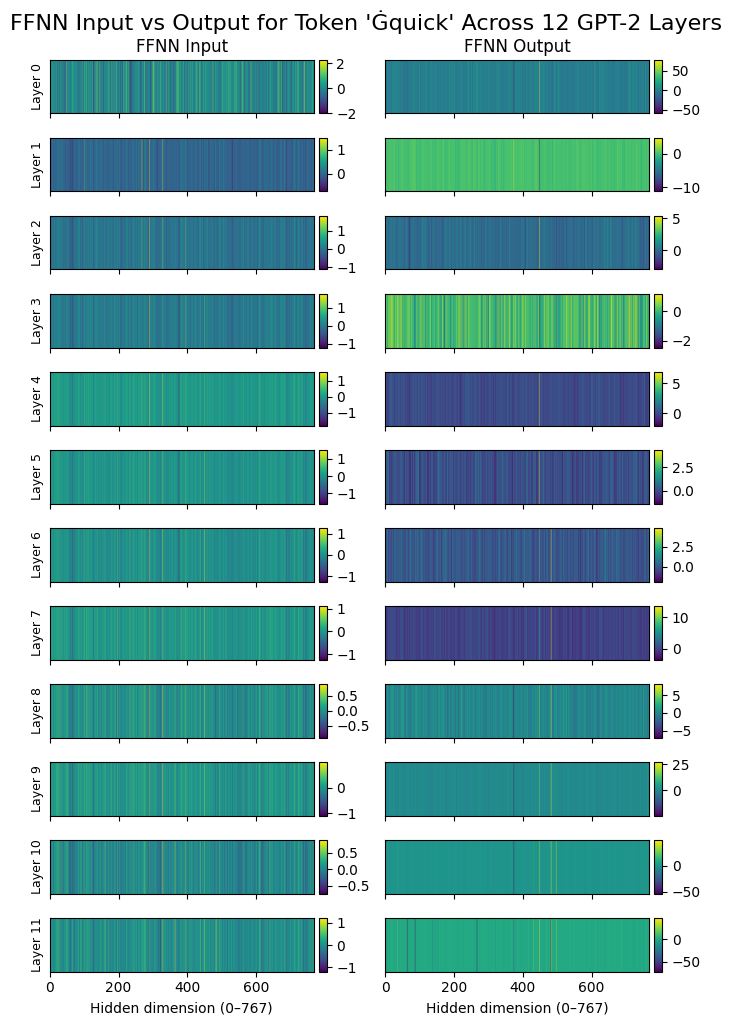

Layer  0 - FFNN Input Vector:  Max = 2.3154, Min = -2.0152
Layer  0 - FFNN Output Vector: Max = 83.4676, Min = -52.1309
Layer  1 - FFNN Input Vector:  Max = 1.8281, Min = -0.8172
Layer  1 - FFNN Output Vector: Max = 2.6687, Min = -10.8672
Layer  2 - FFNN Input Vector:  Max = 2.5125, Min = -1.1477
Layer  2 - FFNN Output Vector: Max = 5.5574, Min = -1.6814
Layer  3 - FFNN Input Vector:  Max = 2.6062, Min = -1.2639
Layer  3 - FFNN Output Vector: Max = 1.8650, Min = -5.6093
Layer  4 - FFNN Input Vector:  Max = 2.3431, Min = -1.6905
Layer  4 - FFNN Output Vector: Max = 4.2720, Min = -1.6602
Layer  5 - FFNN Input Vector:  Max = 2.4109, Min = -1.5223
Layer  5 - FFNN Output Vector: Max = 4.9687, Min = -1.8205
Layer  6 - FFNN Input Vector:  Max = 2.0154, Min = -1.3322
Layer  6 - FFNN Output Vector: Max = 3.9581, Min = -1.7065
Layer  7 - FFNN Input Vector:  Max = 1.7478, Min = -1.3253
Layer  7 - FFNN Output Vector: Max = 8.0399, Min = -2.6344
Layer  8 - FFNN Input Vector:  Max = 1.6597, Min = -1

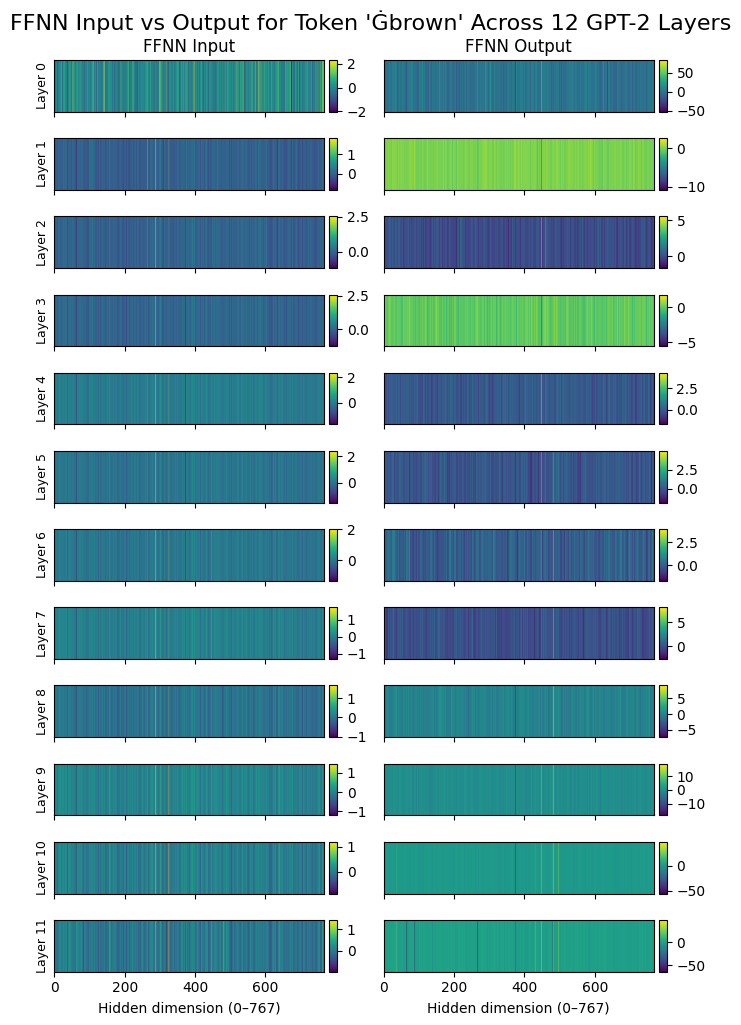

Layer  0 - FFNN Input Vector:  Max = 2.2369, Min = -2.3298
Layer  0 - FFNN Output Vector: Max = 93.0934, Min = -62.0931
Layer  1 - FFNN Input Vector:  Max = 1.5127, Min = -0.9057
Layer  1 - FFNN Output Vector: Max = 2.5814, Min = -8.6321
Layer  2 - FFNN Input Vector:  Max = 1.9465, Min = -1.2356
Layer  2 - FFNN Output Vector: Max = 4.6016, Min = -2.3183
Layer  3 - FFNN Input Vector:  Max = 2.0213, Min = -1.3012
Layer  3 - FFNN Output Vector: Max = 1.5399, Min = -2.3509
Layer  4 - FFNN Input Vector:  Max = 1.7745, Min = -1.6417
Layer  4 - FFNN Output Vector: Max = 2.9773, Min = -1.5741
Layer  5 - FFNN Input Vector:  Max = 1.8944, Min = -1.5788
Layer  5 - FFNN Output Vector: Max = 3.8414, Min = -1.4126
Layer  6 - FFNN Input Vector:  Max = 1.5748, Min = -1.3405
Layer  6 - FFNN Output Vector: Max = 8.5570, Min = -2.3590
Layer  7 - FFNN Input Vector:  Max = 1.3214, Min = -1.2935
Layer  7 - FFNN Output Vector: Max = 15.2297, Min = -4.1626
Layer  8 - FFNN Input Vector:  Max = 1.2203, Min = -0

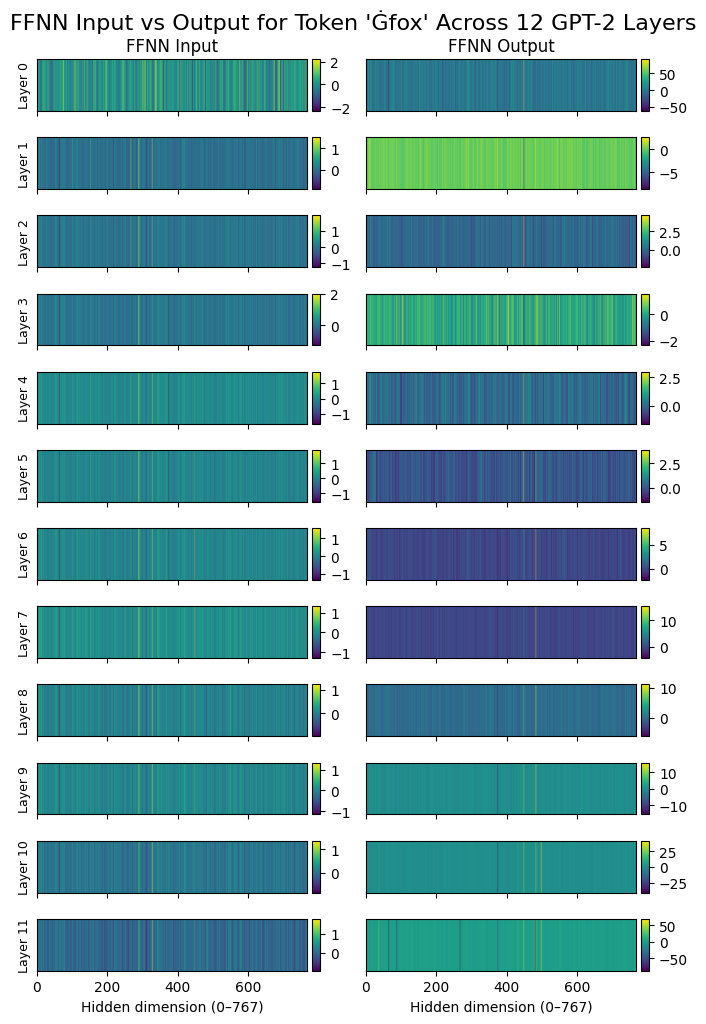

In [3]:
# compare the resluts for each layer, and across different tokens with the bar plot on the side

for i in range(4):

    # Pick token index (e.g., first token)
    token_index = i
    token_str = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][token_index].item())

    # Plot setup
    fig, axes = plt.subplots(12, 2, figsize=(7, 10), sharex=True)
    fig.suptitle(f"FFNN Input vs Output for Token '{token_str}' Across 12 GPT-2 Layers", fontsize=16, y=1.02)

    for layer_idx in range(12):
        block = model.transformer.h[layer_idx]
        hidden_input = outputs.hidden_states[layer_idx]  # shape: [1, seq_len, 768]

        # Pass through LayerNorm and FFNN
        x_ln2_input = block.ln_2(hidden_input)
        ffnn_output = block.mlp(x_ln2_input)

        # Select the token vector
        ffnn_in_vec = x_ln2_input[0, token_index].cpu().detach().numpy()
        ffnn_out_vec = ffnn_output[0, token_index].cpu().detach().numpy()

        # FFNN input heatmap
        ax1 = axes[layer_idx, 0]
        im1 = ax1.imshow(ffnn_in_vec[np.newaxis, :], cmap='viridis', aspect='auto')
        ax1.set_ylabel(f"Layer {layer_idx}", fontsize=9)
        ax1.set_yticks([])
        if layer_idx == 0:
            ax1.set_title("FFNN Input")

        # Add colorbar to input heatmap
        divider1 = make_axes_locatable(ax1)
        cax1 = divider1.append_axes("right", size="3%", pad=0.05)
        plt.colorbar(im1, cax=cax1)

        # FFNN output heatmap
        ax2 = axes[layer_idx, 1]
        im2 = ax2.imshow(ffnn_out_vec[np.newaxis, :], cmap='viridis', aspect='auto')
        ax2.set_yticks([])
        if layer_idx == 0:
            ax2.set_title("FFNN Output")

        # Add colorbar to output heatmap
        divider2 = make_axes_locatable(ax2)
        cax2 = divider2.append_axes("right", size="3%", pad=0.05)
        plt.colorbar(im2, cax=cax2)

        # Print max and min values
        print(f"Layer {layer_idx:2d} - FFNN Input Vector:  Max = {ffnn_in_vec.max():.4f}, Min = {ffnn_in_vec.min():.4f}")
        print(f"Layer {layer_idx:2d} - FFNN Output Vector: Max = {ffnn_out_vec.max():.4f}, Min = {ffnn_out_vec.min():.4f}")

    # X-label only on bottom row
    for ax in axes[-1]:
        ax.set_xlabel("Hidden dimension (0–767)")

    plt.tight_layout()
    plt.subplots_adjust(top=0.97)
    plt.show()


In [4]:
# show the distribution of the values in the buffer, how they change across layers, and how they change across tokens
"""
for layer_idx in range(12):

    block = model.transformer.h[layer_idx]
    hidden_input = outputs.hidden_states[layer_idx]  # shape: [1, seq_len, 768]

    # Pass through LayerNorm and FFNN
    x_ln2_input = block.ln_2(hidden_input)
    ffnn_output = block.mlp(x_ln2_input)

    # Select the token vector
    ffnn_in_vec = x_ln2_input[0, token_index].cpu().detach().numpy()
    ffnn_out_vec = ffnn_output[0, token_index].cpu().detach().numpy()


    # Remove batch dimension
    out_np = ffnn_output[0, token_index].squeeze(0).detach().numpy()

    # === Activation Histogram ===
    plt.figure(figsize=(8, 4))
    plt.hist(out_np, bins=100, color="purple", alpha=0.7)
    plt.title("FFNN Neuron Activation Distribution")
    plt.xlabel("Activation Value")
    plt.ylabel("Neuron Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Sparsity Metric ===
    num_nonzero = np.sum(np.abs(out_np) > 1e-3)
    print(f"Active neurons: {num_nonzero} / {len(out_np)} → Sparsity: {1 - num_nonzero / len(out_np):.2%}")"""


'\nfor layer_idx in range(12):\n\n    block = model.transformer.h[layer_idx]\n    hidden_input = outputs.hidden_states[layer_idx]  # shape: [1, seq_len, 768]\n\n    # Pass through LayerNorm and FFNN\n    x_ln2_input = block.ln_2(hidden_input)\n    ffnn_output = block.mlp(x_ln2_input)\n\n    # Select the token vector\n    ffnn_in_vec = x_ln2_input[0, token_index].cpu().detach().numpy()\n    ffnn_out_vec = ffnn_output[0, token_index].cpu().detach().numpy()\n\n\n    # Remove batch dimension\n    out_np = ffnn_output[0, token_index].squeeze(0).detach().numpy()\n\n    # === Activation Histogram ===\n    plt.figure(figsize=(8, 4))\n    plt.hist(out_np, bins=100, color="purple", alpha=0.7)\n    plt.title("FFNN Neuron Activation Distribution")\n    plt.xlabel("Activation Value")\n    plt.ylabel("Neuron Count")\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()\n\n    # === Sparsity Metric ===\n    num_nonzero = np.sum(np.abs(out_np) > 1e-3)\n    print(f"Active neurons: {num_nonzero} /

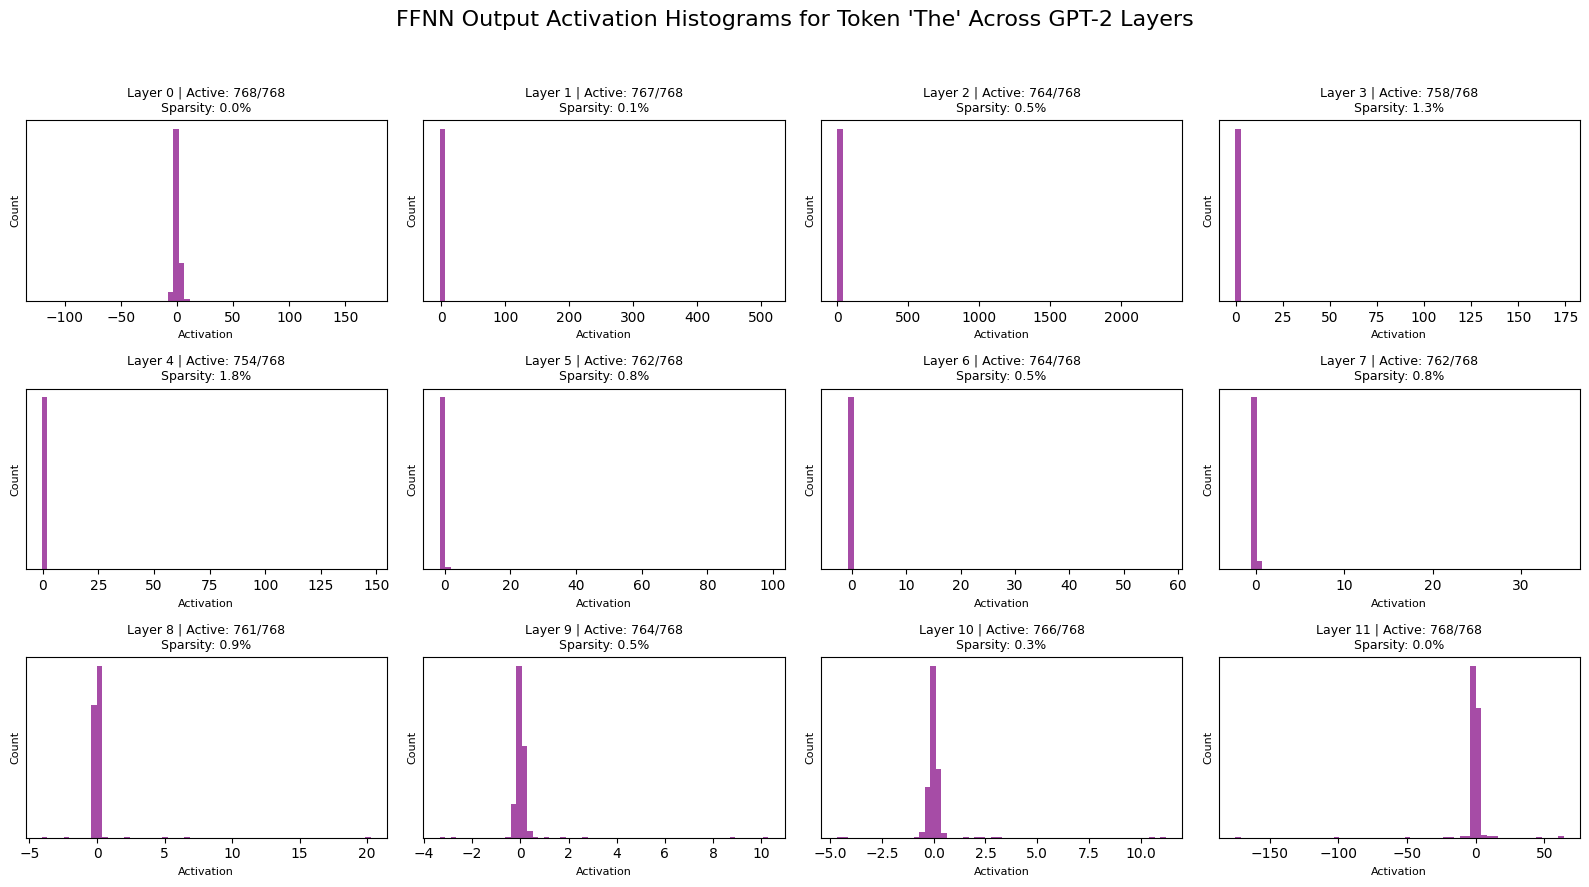

In [5]:
# Set token index to analyze
token_index = 0
token_str = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][token_index].item())

# Prepare plot grid
fig, axes = plt.subplots(3, 4, figsize=(16, 9))
fig.suptitle(f"FFNN Output Activation Histograms for Token '{token_str}' Across GPT-2 Layers", fontsize=16)

for layer_idx in range(12):
    row = layer_idx // 4
    col = layer_idx % 4
    ax = axes[row, col]

    # Get transformer block
    block = model.transformer.h[layer_idx]
    hidden_input = outputs.hidden_states[layer_idx]  # shape: [1, seq_len, 768]

    # Get FFNN input and output
    x_ln2_input = block.ln_2(hidden_input)
    ffnn_output = block.mlp(x_ln2_input)

    # Select output vector for chosen token
    out_np = ffnn_output[0, token_index].cpu().detach().numpy()

    # Compute sparsity
    num_nonzero = np.sum(np.abs(out_np) > 1e-3)
    sparsity = 1 - num_nonzero / len(out_np)

    # Plot histogram
    ax.hist(out_np, bins=60, color="purple", alpha=0.7)
    ax.set_title(f"Layer {layer_idx} | Active: {num_nonzero}/{len(out_np)}\nSparsity: {sparsity:.1%}", fontsize=9)
    ax.set_yticks([])
    ax.set_xlabel("Activation", fontsize=8)
    ax.set_ylabel("Count", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Second Analysis

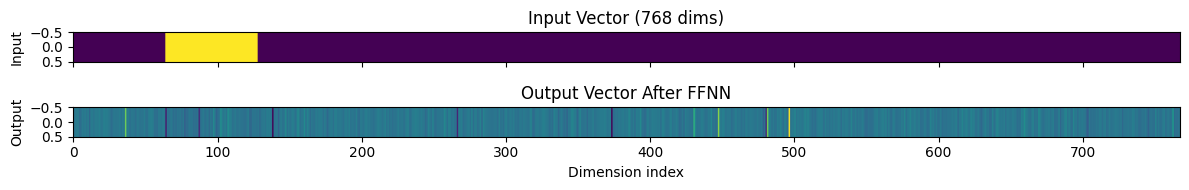

In [6]:
# using such distribution create an artificial buffer, 111000 and 1010101 to feed to the model and see how it behaves across layers, 
# and how it changes if I move the 1111 as if they were corresponding to different attention heads

# Create your input vector
x = torch.zeros(768)
x[64:128] = 1.0
x = x.unsqueeze(0)

# Get output from FFNN
with torch.no_grad():
    output = block.mlp(x)

# Remove batch dimension
x_np = x.squeeze(0).numpy()
out_np = output.squeeze(0).cpu().detach().numpy()


# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 2), sharex=True)

# Input heatmap
ax[0].imshow(x_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[0].set_title("Input Vector (768 dims)")
ax[0].set_ylabel("Input")

# Output heatmap
ax[1].imshow(out_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[1].set_title("Output Vector After FFNN")
ax[1].set_ylabel("Output")
ax[1].set_xlabel("Dimension index")
plt.tight_layout()
plt.show()


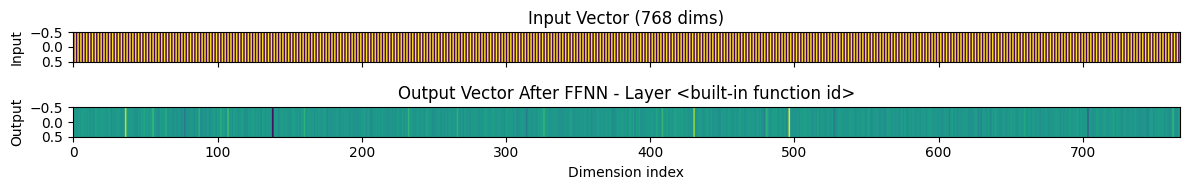

In [7]:
# Load pre-trained GPT-2 (small version)
model = GPT2Model.from_pretrained("gpt2")

 # Choose transformer block
block = model.h[layer_idx]  # ✅

# Create structured input (second attention head activated)
x = torch.ones(768)
for i in range(768):
    if(i%2==0):
        x[i] = 0.0
x = x.unsqueeze(0)  # [1, 768]

# Get output from FFNN
with torch.no_grad():
    output = block.mlp(x)

# Remove batch dimension
x_np = x.squeeze(0).numpy()
out_np = output.squeeze(0).numpy()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 2), sharex=True)

# Input heatmap
ax[0].imshow(x_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[0].set_title("Input Vector (768 dims)")
ax[0].set_ylabel("Input")

# Output heatmap
ax[1].imshow(out_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[1].set_title(f"Output Vector After FFNN - Layer {id}")
ax[1].set_ylabel("Output")
ax[1].set_xlabel("Dimension index")
plt.tight_layout()
plt.show()


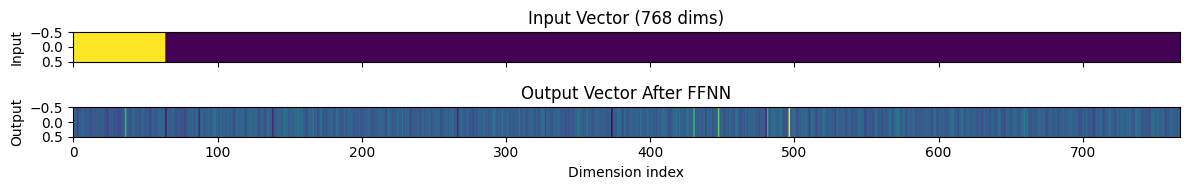

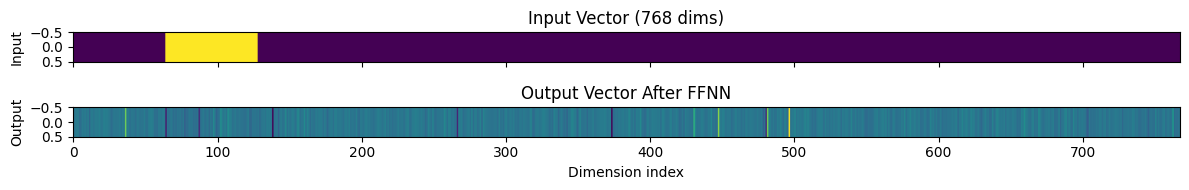

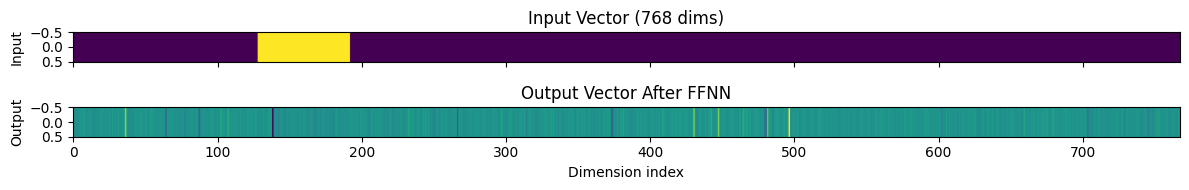

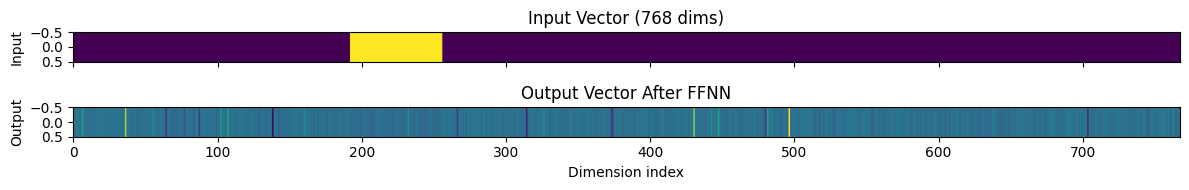

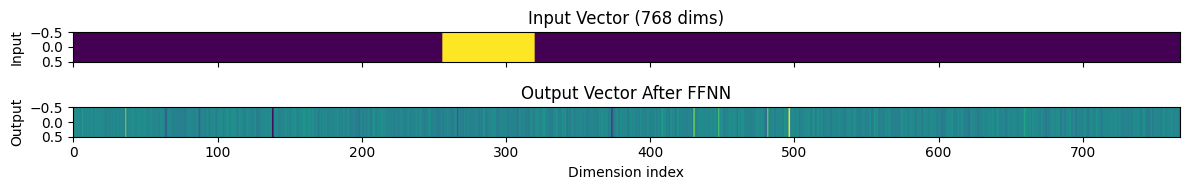

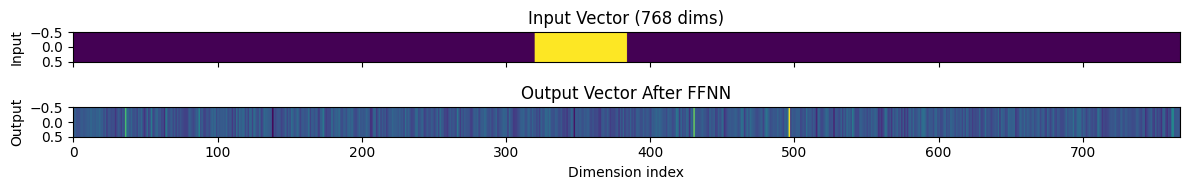

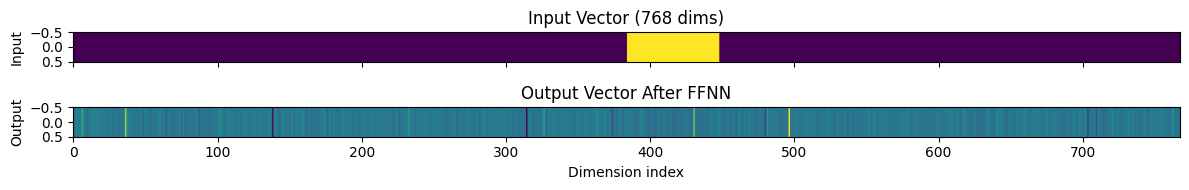

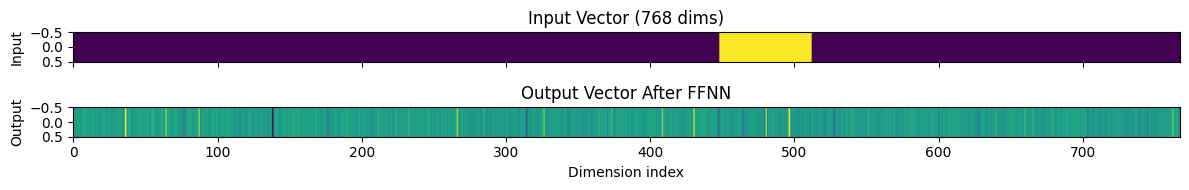

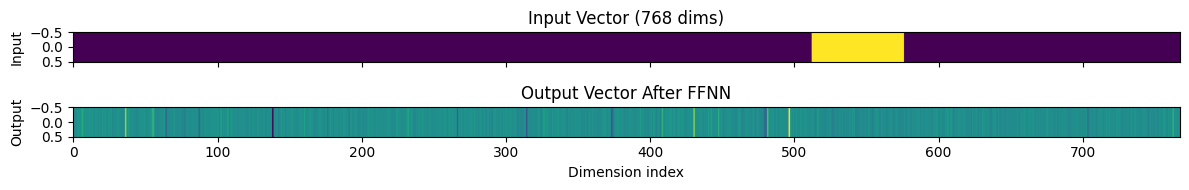

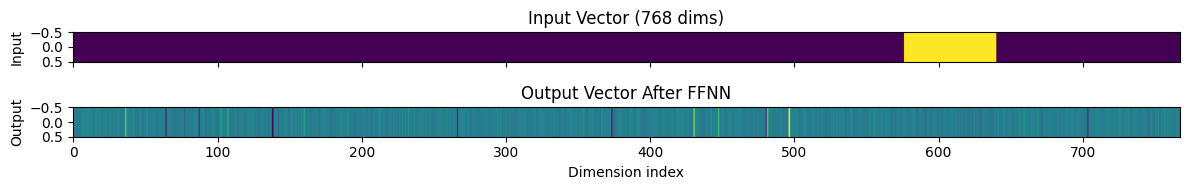

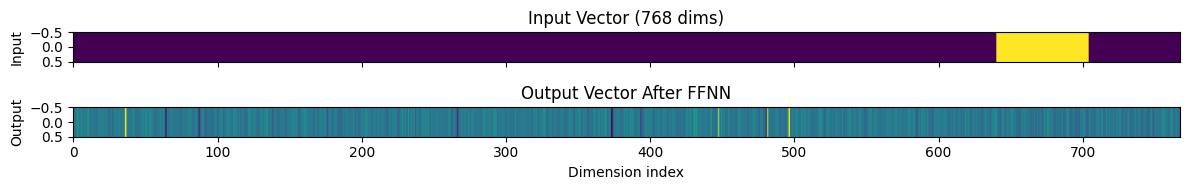

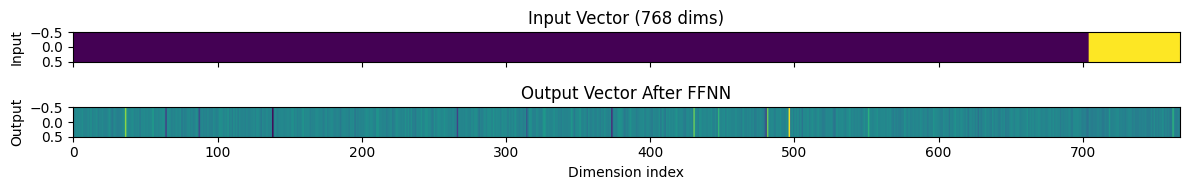

(768,)


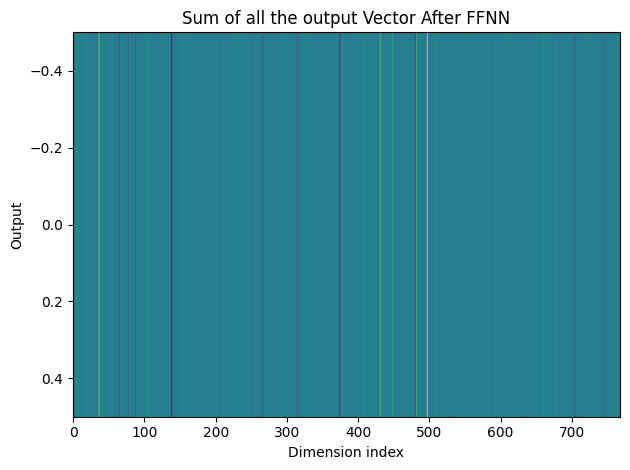

In [8]:
sum_out = []
for k in range(12):
    # Create your input vector
    x = torch.zeros(768)
    x[k*64:k*64 + 64] = 1.0
    x = x.unsqueeze(0)

    # Get output from FFNN
    with torch.no_grad():
        output = block.mlp(x)

    # Remove batch dimension
    x_np = x.squeeze(0).numpy()
    out_np = output.squeeze(0).cpu().detach().numpy()
    sum_out.append(out_np)

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(12, 2), sharex=True)

    # Input heatmap
    ax[0].imshow(x_np[np.newaxis, :], cmap='viridis', aspect='auto')
    ax[0].set_title("Input Vector (768 dims)")
    ax[0].set_ylabel("Input")

    # Output heatmap
    ax[1].imshow(out_np[np.newaxis, :], cmap='viridis', aspect='auto')
    ax[1].set_title("Output Vector After FFNN")
    ax[1].set_ylabel("Output")
    ax[1].set_xlabel("Dimension index")
    plt.tight_layout()
    plt.show()

# sum the elements inside the output vector
total_sum = np.sum(sum_out, axis=0)
print(total_sum.shape)

# Plotting
figsize=(12, 2)

# Output heatmap
plt.imshow(total_sum[np.newaxis, :], cmap='viridis', aspect='auto')
plt.title("Sum of all the output Vector After FFNN")
plt.ylabel("Output")
plt.xlabel("Dimension index")
plt.tight_layout()
plt.show()


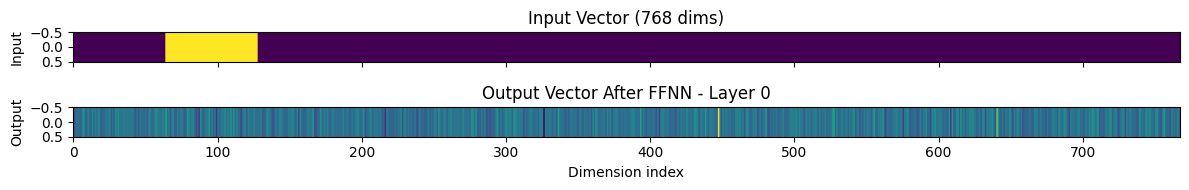

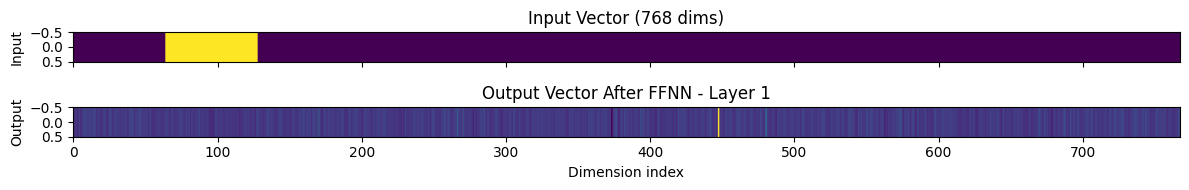

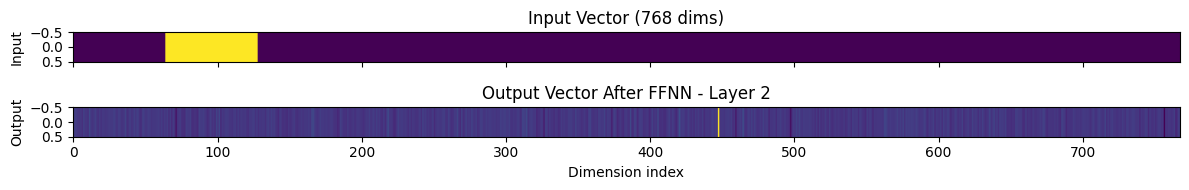

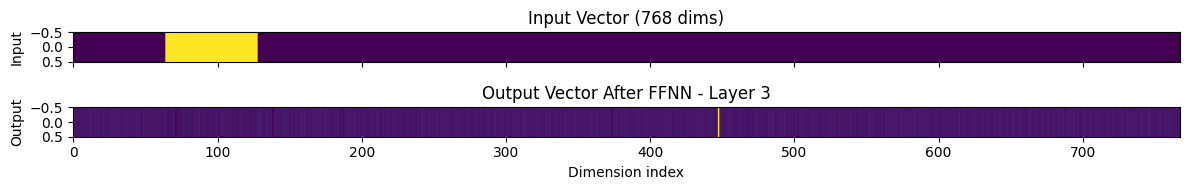

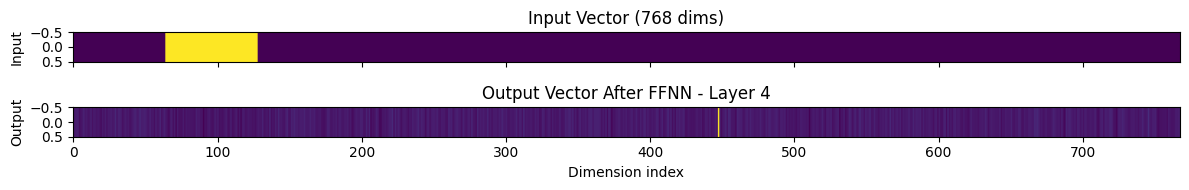

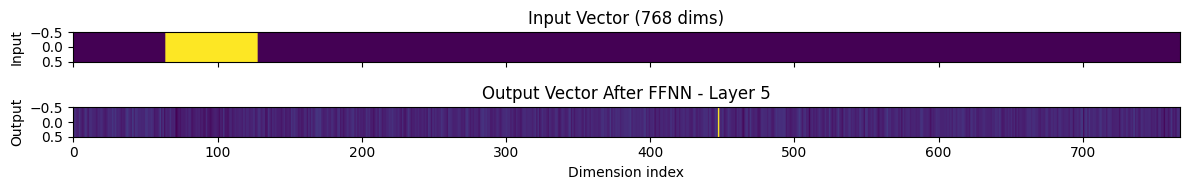

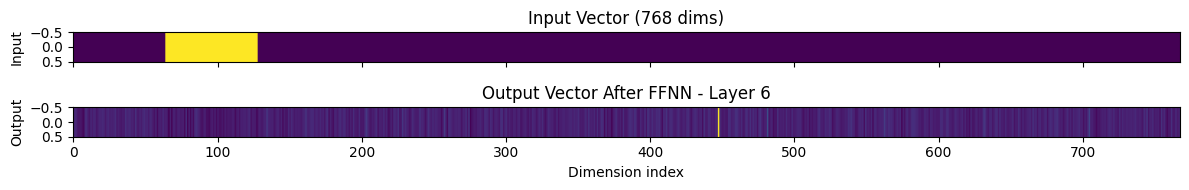

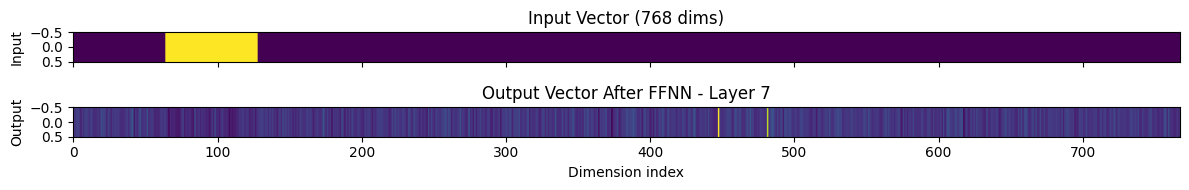

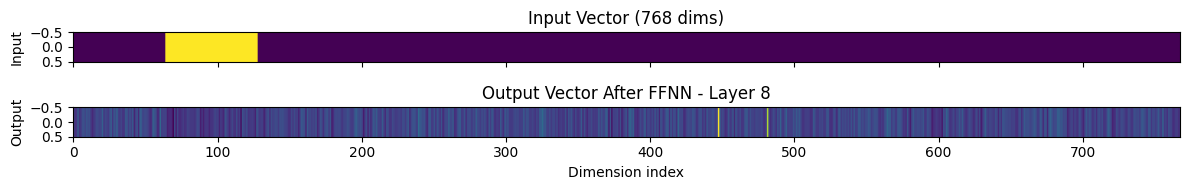

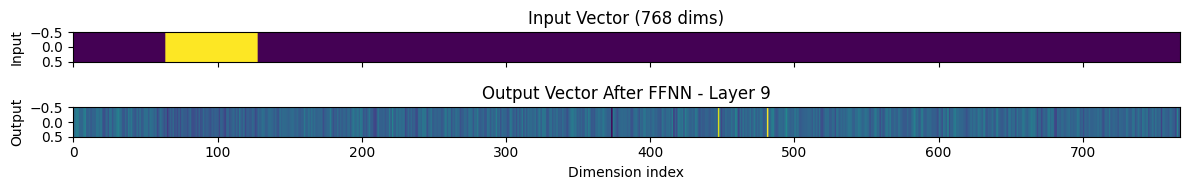

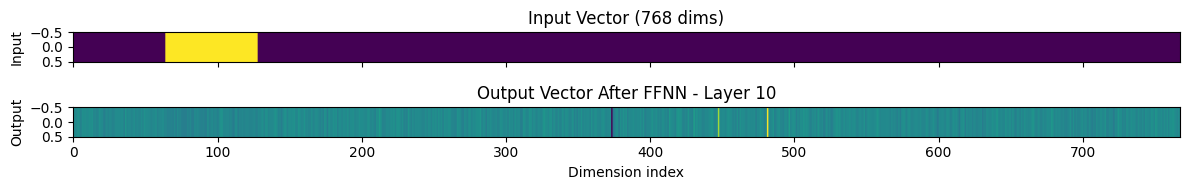

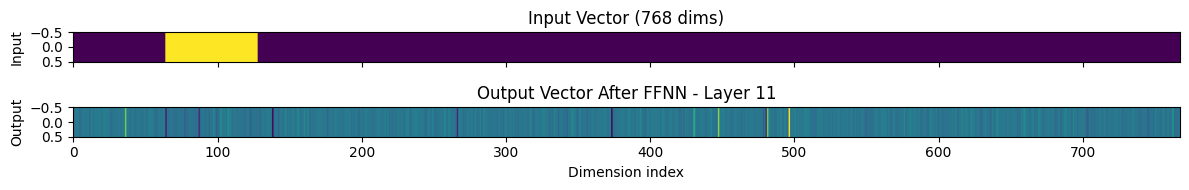

In [9]:
for id in range(12):
    # Choose transformer block
    block = model.h[id]

    # Create structured input (second attention head activated)
    x = torch.zeros(768)
    x[64:128] = 1.0
    x = x.unsqueeze(0)  # [1, 768]

    # Get output from FFNN
    with torch.no_grad():
        output = block.mlp(x)

    # Remove batch dimension
    x_np = x.squeeze(0).numpy()
    out_np = output.squeeze(0).numpy()

    # Plotting
    fig, ax = plt.subplots(2, 1, figsize=(12, 2), sharex=True)

    # Input heatmap
    ax[0].imshow(x_np[np.newaxis, :], cmap='viridis', aspect='auto')
    ax[0].set_title("Input Vector (768 dims)")
    ax[0].set_ylabel("Input")

    # Output heatmap
    ax[1].imshow(out_np[np.newaxis, :], cmap='viridis', aspect='auto')
    ax[1].set_title(f"Output Vector After FFNN - Layer {id}")
    ax[1].set_ylabel("Output")
    ax[1].set_xlabel("Dimension index")
    plt.tight_layout()
    plt.show()


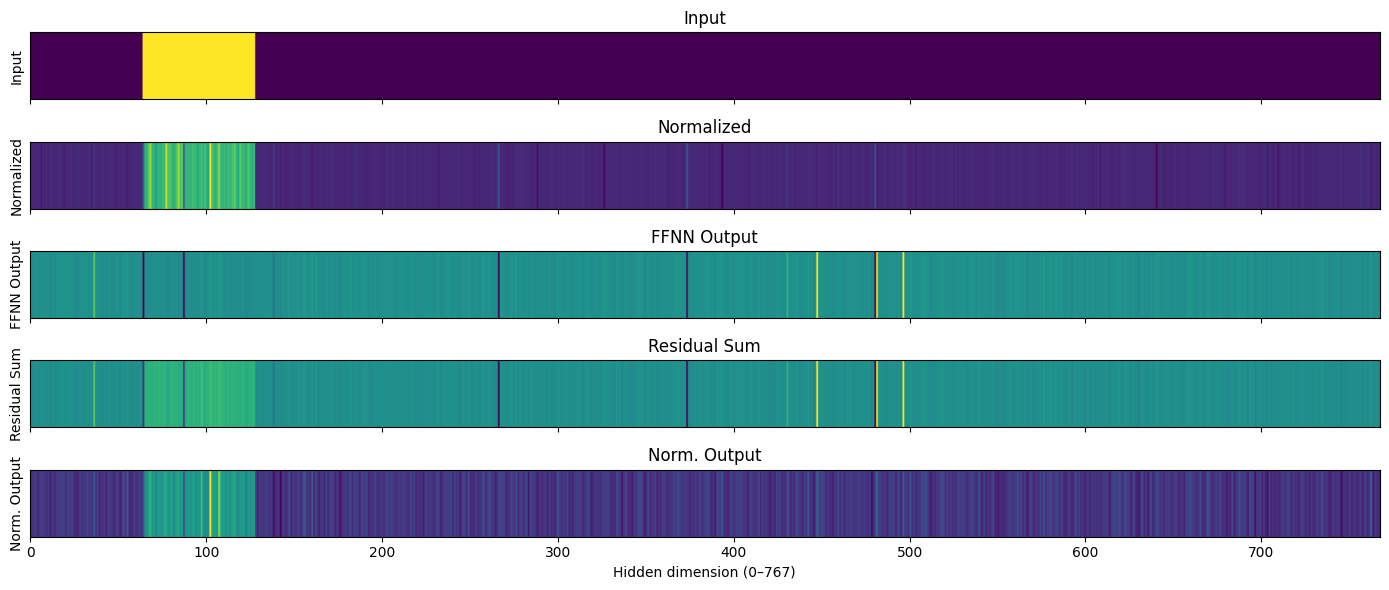

Sum of elements in normalized vector (Normalized and Norm. Output): 5.9807167 13.682142


In [19]:
# Show visually how a buffer which was originally only a solid block gets shuffled by the model after normalization, FFNN, residual sum and final normalization
# Show visually the difference between the buffer after the FFNN and the buffer after the residual sum by doing the difference


# Load pre-trained GPT-2 (small version)
model = GPT2Model.from_pretrained("gpt2")

# Choose a transformer block
block = model.h[layer_idx]

# Create input vector: activate second attention head
x = torch.zeros(1, 768)
x[0, 64:128] = 100.0  # shape [1, 768]

with torch.no_grad():
    # Normalize input before FFNN
    x_normed = block.ln_2(x)

    # FFNN output
    ffnn_out = block.mlp(x_normed)

    # Residual sum
    x_residual = x + ffnn_out

    # Final output after residual + LayerNorm
    x_final = block.ln_2(x_residual)

# Convert to numpy for plotting
vectors = [
    x.squeeze(0).numpy(),
    x_normed.squeeze(0).numpy(),
    ffnn_out.squeeze(0).numpy(),
    x_residual.squeeze(0).numpy(),
    x_final.squeeze(0).numpy()
]
titles = ["Input", "Normalized", "FFNN Output", "Residual Sum", "Norm. Output"]

# Plot heatmaps
fig, axes = plt.subplots(len(vectors), 1, figsize=(14, 6), sharex=True)

for i, (vec, title) in enumerate(zip(vectors, titles)):
    axes[i].imshow(vec[np.newaxis, :], cmap='viridis', aspect='auto')
    axes[i].set_title(title)
    axes[i].set_ylabel(title)
    axes[i].set_yticks([])

axes[-1].set_xlabel("Hidden dimension (0–767)")
plt.tight_layout()
plt.show()

# sum the values of the elements inside the output vector
print("Sum of elements in normalized vector (Normalized and Norm. Output):", np.sum(vectors[1]), np.sum(vectors[-1]))



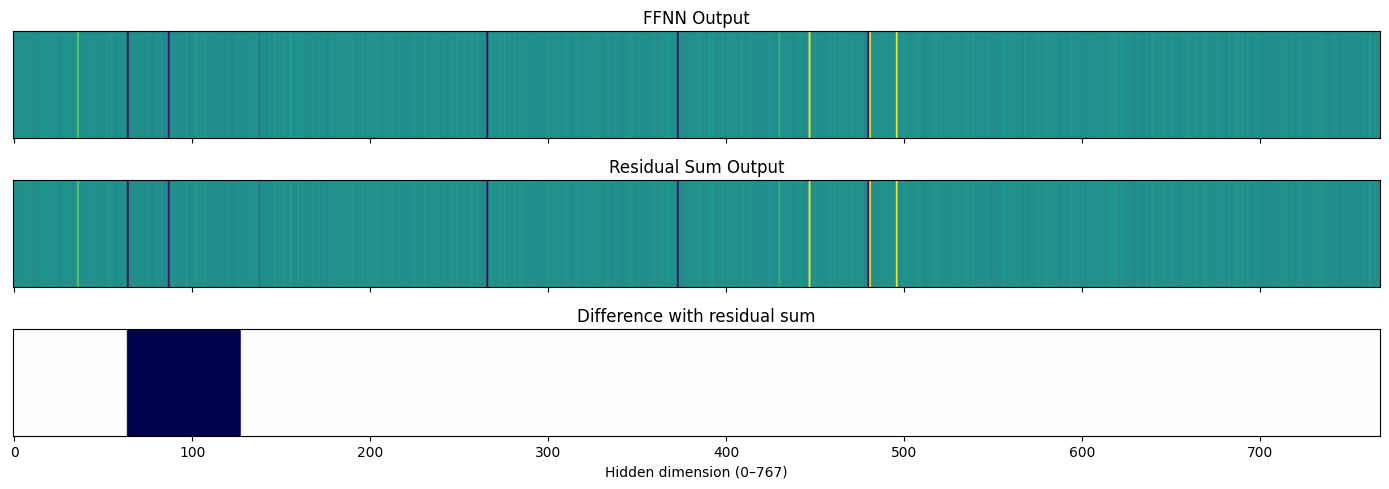

In [11]:
# Verify that the Residual sum is actually different from the FFNN output

# Difference between the two
diff = (ffnn_out - x_residual).squeeze(0).numpy()

# Convert all to numpy for heatmaps
ffnn = vectors[2]
rs = vectors[3]

# Plot heatmaps
fig, axes = plt.subplots(3, 1, figsize=(14, 5), sharex=True)

# Original GPT-2 FFNN
axes[0].imshow(ffnn[np.newaxis, :], cmap='viridis', aspect='auto')
axes[0].set_title("FFNN Output")

# Reconstructed FFNN
axes[1].imshow(rs[np.newaxis, :], cmap='viridis', aspect='auto')
axes[1].set_title("Residual Sum Output")

# Difference
axes[2].imshow(diff[np.newaxis, :], cmap='seismic', aspect='auto', vmin=-1, vmax=1)
axes[2].set_title("Difference with residual sum")
axes[2].set_xlabel("Hidden dimension (0–767)")

for ax in axes:
    ax.set_yticks([])

plt.tight_layout()
plt.show()


## Third approach

In [12]:
# recreate the model block using the weights and biases from the original model

# Extract weights and biases from the Conv1D layers
def convert_conv1d_to_linear(conv1d):
    # Conv1D in GPT-2 uses weight of shape (out_features, in_features)
    weight = conv1d.weight.T  # Shape: [in_features, out_features]
    bias = conv1d.bias
    return nn.Linear(weight.shape[0], weight.shape[1], bias=True).to(weight.device).load_state_dict({
        'weight': weight.T,
        'bias': bias
    }, strict=True)

# Extract components
fc1 = model.h[layer_idx].mlp.c_fc
proj = model.h[layer_idx].mlp.c_proj
act = model.h[layer_idx].mlp.act  # NewGELUActivation

# Recreate the FFNN as a PyTorch module
class GPT2FFNN(nn.Module):
    def __init__(self, fc1, proj, act):
        super().__init__()
        self.fc1 = nn.Linear(fc1.weight.shape[1], fc1.weight.shape[0])
        self.proj = nn.Linear(proj.weight.shape[1], proj.weight.shape[0])
        self.act = act  # This is already a module

        # Load weights
        self.fc1.weight.data = fc1.weight.T.clone()
        self.fc1.bias.data = fc1.bias.clone()
        self.fc1.bias.data = torch.zeros_like(fc1.bias)     # comment this line if you want to keep the original bias
        self.proj.weight.data = proj.weight.T.clone()
        self.proj.bias.data = proj.bias.clone()
        self.proj.bias.data = torch.zeros_like(proj.bias)   # comment this line if you want to keep the original bias

    def forward(self, x):
        return self.proj(self.act(self.fc1(x)))

# Instantiate
ffnn_reconstructed = GPT2FFNN(fc1, proj, act)




In [13]:
#x = torch.randn(1, 768)  # corresponds to [batch_size, hidden_size]

# Create a vector of zeros
x = torch.zeros(768)

# Set elements 64 to 127 to 1 (second head block)
k=11
x[k*64:k*64+64] = 1.0

# Add batch dimension: [1, 768]
x = x.unsqueeze(0)

# Pass through FFNN
output = ffnn_reconstructed(x)

print(x.shape, output.shape)  # Should be [1, 768]
print(x[0][:3])
print(output[0][:3])
#print(output[0])
print(sum(x[0]), sum(output[0]), "\n")

sx = []
so = []
    
for k in range(12):
    x = torch.zeros(768)
    x[k*64:k*64+64] = 1.0
    x = x.unsqueeze(0)
    output = ffnn_reconstructed(x)
    print(k, sum(x[0]), sum(output[0]))
    sx.append(sum(x[0]))
    so.append(sum(output[0]))

print("\n", sum(sx), sum(so))


torch.Size([1, 768]) torch.Size([1, 768])
tensor([0., 0., 0.])
tensor([-5.5697,  0.3439,  5.3088], grad_fn=<SliceBackward0>)
tensor(64.) tensor(-42.4882, grad_fn=<AddBackward0>) 

0 tensor(64.) tensor(-16.2466, grad_fn=<AddBackward0>)
1 tensor(64.) tensor(-125.5241, grad_fn=<AddBackward0>)
2 tensor(64.) tensor(-69.8969, grad_fn=<AddBackward0>)
3 tensor(64.) tensor(-64.4926, grad_fn=<AddBackward0>)
4 tensor(64.) tensor(-99.5962, grad_fn=<AddBackward0>)
5 tensor(64.) tensor(90.4113, grad_fn=<AddBackward0>)
6 tensor(64.) tensor(1.1919, grad_fn=<AddBackward0>)
7 tensor(64.) tensor(74.4619, grad_fn=<AddBackward0>)
8 tensor(64.) tensor(-7.0269, grad_fn=<AddBackward0>)
9 tensor(64.) tensor(-170.1499, grad_fn=<AddBackward0>)
10 tensor(64.) tensor(-107.9790, grad_fn=<AddBackward0>)
11 tensor(64.) tensor(-42.4882, grad_fn=<AddBackward0>)

 tensor(768.) tensor(-537.3352, grad_fn=<AddBackward0>)


In [14]:
# Load pre-trained GPT-2 (small version)
model0 = GPT2Model.from_pretrained("gpt2")


In [15]:
block = model0.h[layer_idx]

print(block)


GPT2Block(
  (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (attn): GPT2Attention(
    (c_attn): Conv1D(nf=2304, nx=768)
    (c_proj): Conv1D(nf=768, nx=768)
    (attn_dropout): Dropout(p=0.1, inplace=False)
    (resid_dropout): Dropout(p=0.1, inplace=False)
  )
  (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (mlp): GPT2MLP(
    (c_fc): Conv1D(nf=3072, nx=768)
    (c_proj): Conv1D(nf=768, nx=3072)
    (act): NewGELUActivation()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)


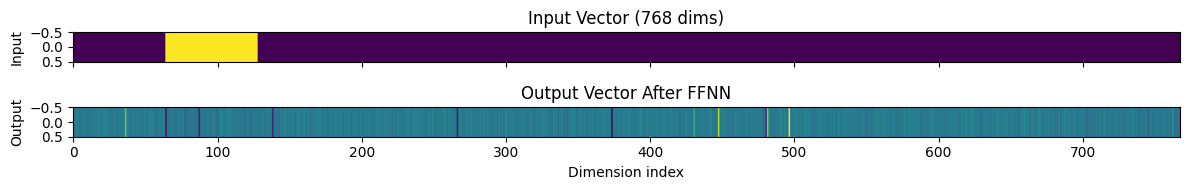

In [16]:
# Create your input vector
x = torch.zeros(768)
x[64:128] = 1.0
#x = block.ln_2(x)
x = x.unsqueeze(0)


# Get output from FFNN
with torch.no_grad():
    output = ffnn_reconstructed(x)

# Remove batch dimension
x_np = x.squeeze(0).detach().numpy()
out_np = output.squeeze(0).numpy()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 2), sharex=True)

# Input heatmap
ax[0].imshow(x_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[0].set_title("Input Vector (768 dims)")
ax[0].set_ylabel("Input")

# Output heatmap
ax[1].imshow(out_np[np.newaxis, :], cmap='viridis', aspect='auto')
ax[1].set_title("Output Vector After FFNN")
ax[1].set_ylabel("Output")
ax[1].set_xlabel("Dimension index")
plt.tight_layout()
plt.show()


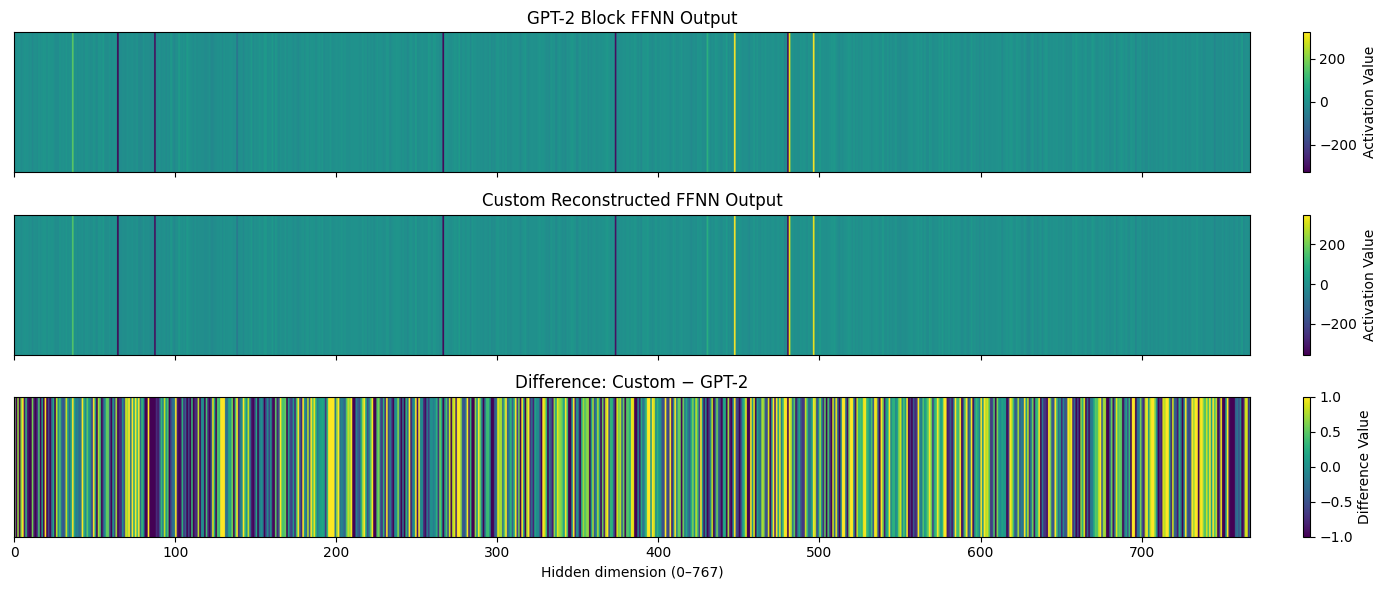

difference: 26.826996 -26.978668 

gpt2 original: 323.18628 -327.9529 

custom without the biases: 350.01328 -354.93158 



In [20]:
# show the influence of biases by removing those in the constructed model

# 1. Choose a GPT-2 block
block = model.h[layer_idx]

# 2. Input vector (structured or random)
x = torch.zeros(768)
x[64:128] = 100
x = x.unsqueeze(0)  # shape: [1, 768]
x_input = x

#x_input = torch.randn(1, 768)

# 3. Normalize input
x_normed = block.ln_2(x_input)

# 4. FFNN through GPT-2
with torch.no_grad():
    ffnn_out_gpt2 = block.mlp(x_normed)

# 5. FFNN through your custom reconstructed version
with torch.no_grad():
    ffnn_out_custom = ffnn_reconstructed(x_normed)

# 6. Difference between the two
diff = (ffnn_out_custom - ffnn_out_gpt2).squeeze(0).numpy()

# 7. Convert all to numpy for heatmaps
gpt2_np = ffnn_out_gpt2.squeeze(0).numpy()
custom_np = ffnn_out_custom.squeeze(0).numpy()


import numpy as np
import matplotlib.pyplot as plt

# Simulated data (replace these with your actual outputs)

diff = custom_np - gpt2_np

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

# Plot each heatmap
im0 = axes[0].imshow(gpt2_np[np.newaxis, :], cmap='viridis', aspect='auto')
axes[0].set_title("GPT-2 Block FFNN Output")
cbar0 = fig.colorbar(im0, ax=axes[0], orientation='vertical', fraction=0.015, pad=0.04)
cbar0.set_label('Activation Value')

im1 = axes[1].imshow(custom_np[np.newaxis, :], cmap='viridis', aspect='auto')
axes[1].set_title("Custom Reconstructed FFNN Output")
cbar1 = fig.colorbar(im1, ax=axes[1], orientation='vertical', fraction=0.015, pad=0.04)
cbar1.set_label('Activation Value')

im2 = axes[2].imshow(diff[np.newaxis, :], cmap='viridis', aspect='auto', vmin=-1, vmax=1)
axes[2].set_title("Difference: Custom − GPT-2")
axes[2].set_xlabel("Hidden dimension (0–767)")
cbar2 = fig.colorbar(im2, ax=axes[2], orientation='vertical', fraction=0.015, pad=0.04)
cbar2.set_label('Difference Value')

# Remove y-axis ticks
for ax in axes:
    ax.set_yticks([])

plt.tight_layout()
plt.show()


print("difference:", max(diff), min(diff), "\n")
print("gpt2 original:", max(gpt2_np),  min(gpt2_np), "\n")
print("custom without the biases:", max(custom_np),  min(custom_np), "\n")



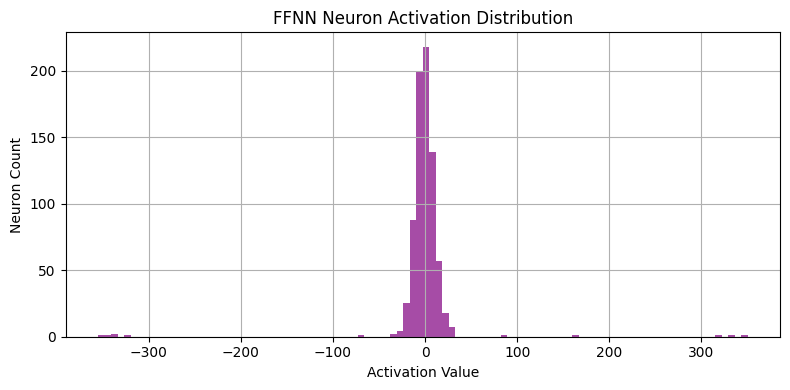

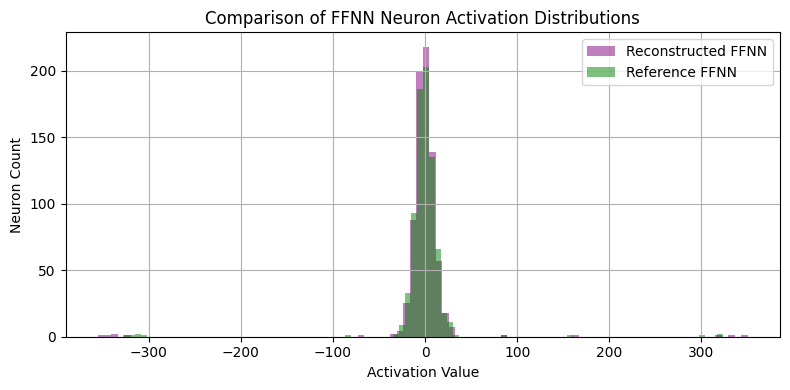

Active neurons: 768 / 768 → Sparsity: 0.00%


In [18]:
# show the histogram of neurons activation with and without biases

# Create your input vector
x = torch.zeros(768)
x[64:128] = 1.0
x = x.unsqueeze(0)

# Get output from FFNN
with torch.no_grad():
    output = ffnn_reconstructed(x)

# Remove batch dimension
x_np = x.squeeze(0).numpy()
out_np = output.squeeze(0).numpy()

# === Activation Histogram ===
plt.figure(figsize=(8, 4))
plt.hist(custom_np, bins=100, color="purple", alpha=0.7)
plt.title("FFNN Neuron Activation Distribution")
plt.xlabel("Activation Value")
plt.ylabel("Neuron Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram comparing out_np (reconstructed FFNN) and ffnn_out_np (reference)
plt.figure(figsize=(8, 4))
plt.hist(custom_np, bins=100, color="purple", alpha=0.5, label="Reconstructed FFNN")
plt.hist(gpt2_np, bins=100, color="green", alpha=0.5, label="Reference FFNN")
plt.title("Comparison of FFNN Neuron Activation Distributions")
plt.xlabel("Activation Value")
plt.ylabel("Neuron Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Sparsity Metric ===
num_nonzero = np.sum(np.abs(gpt2_np) > 1e-3)
print(f"Active neurons: {num_nonzero} / {len(gpt2_np)} → Sparsity: {1 - num_nonzero / len(gpt2_np):.2%}")

